# PRUDENTIAL LIFE INSURANCE ASSESSMENT

## BUSINESS PROBLEM

    So let's understand the process for generating an insurance quote. The detailed information provided by the prospect           regarding his own life such as health, occupation, income and much more, forms the basis of assessment of risk. From the companies end, there is human intervention at various stages to assess the risk. The insurance quote, generated after       this time-consuming process may have some additional conditions required to be fulfilled by the prospect. So, prospect may take additional days to fulfill the condition. This results in additional time and costs. This adds to buying resistance and loss of a potential customer.

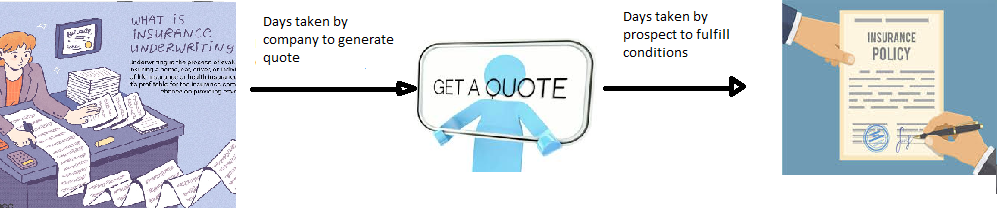

## SIMPLIFICATION

    Well, there may be many more loose ends to deal with before taking a chill pill! let's start with... getting a quote            instantly. And that depends on the final insurance rating given by the underwriter. We can predict this rating at the      time of proposal to speed things up. We already have a dataset with some 59000 instances and around 125 features. 
    
    I have wrangled the data a bit, taken utmost care of the outliers and used Random Forest classifier and Deep neural     network for predicting the ratings.

The link for the dataset is: https://www.kaggle.com/c/prudential-life-insurance-assessment/data


In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
# reading data
df=pd.read_csv('train.csv')

### Data Summaries

In [4]:
d_types = []
n_unique = []
n_nan = []
for col in df.columns:
    d_types.append(df[col].dtypes)
    n_unique.append( df[col].nunique())
    n_nan.append(df[col].isnull().sum())
view = pd.DataFrame({'columns':df.columns , 'd_types':d_types , 'n_unique':n_unique , 'n_nan' : n_nan })
view
   

,columns,d_types,n_unique,n_nan
0,Id,int64,59381,0
1,Product_Info_1,int64,2,0
2,Product_Info_2,object,19,0
3,Product_Info_3,int64,34,0
4,Product_Info_4,float64,1491,0
...,...,...,...,...
123,Medical_Keyword_45,int64,2,0
124,Medical_Keyword_46,int64,2,0
125,Medical_Keyword_47,int64,2,0
126,Medical_Keyword_48,int64,2,0


In [5]:
df.describe(include=(np.number))


,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2.142958,0.361469,1.209326,2.007427,5.835840,2.883666,1.027180,1.409188,1.038531,1.727606,1.055792,2.146983,1.958707,0.001733,1.901989,2.048484,2.419360,2.686230,0.474550,0.497737,0.444890,0.484635,7.962172,253.987100,2.102171,...,0.036459,0.058015,0.010003,0.005962,0.007848,0.190465,0.012715,0.009161,0.007494,0.009296,0.008134,0.014601,0.037167,0.097775,0.018895,0.089456,0.013439,0.011856,0.014937,0.011755,0.025042,0.010896,0.021168,0.022836,0.020646,0.006938,0.010407,0.066587,0.006837,0.013658,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,0.082347,4.227082,0.715034,0.032816,0.350033,0.349551,0.417939,0.085858,2.674536,0.320627,0.231566,0.491688,0.274915,0.445195,0.329328,0.989139,0.945739,0.007338,0.971223,0.755149,0.509577,0.483159,0.154959,0.140187,0.163012,0.129200,13.027697,178.621154,0.303098,...,0.187432,0.233774,0.099515,0.076981,0.088239,0.392671,0.112040,0.095275,0.086244,0.095967,0.089821,0.119949,0.189172,0.297013,0.136155,0.285404,0.115145,0.108237,0.121304,0.107780,0.156253,0.103813,0.143947,0.149380,0.142198,0.083007,0.101485,0.249307,0.082405,0.116066,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


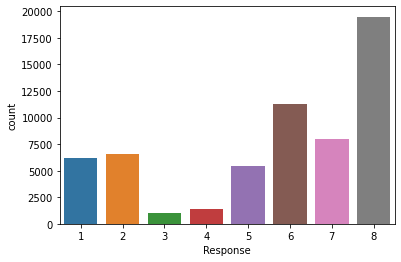

In [6]:
sns.countplot(df['Response'])

The target variable has imbalanced reresentation of classes.

### Columns with missing values

In [7]:
nanlist = [col for col in df.columns if df[col].isnull().sum()>0]

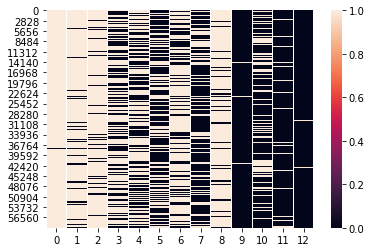

In [8]:
# Heatmap for displaying the density of missing values

sns.heatmap(np.where(df[nanlist].isnull()==True, 0, 1))

In [9]:
# Percentage of missing values in each column
for col in nanlist:
    nan_percent = np.round(len(df[df[col].isnull()==True]) / len(df) * 100)
    print(col+': ', nan_percent)


Employment_Info_1:  0.0
Employment_Info_4:  11.0
Employment_Info_6:  18.0
Insurance_History_5:  43.0
Family_Hist_2:  48.0
Family_Hist_3:  58.0
Family_Hist_4:  32.0
Family_Hist_5:  70.0
Medical_History_1:  15.0
Medical_History_10:  99.0
Medical_History_15:  75.0
Medical_History_24:  94.0
Medical_History_32:  98.0


In [10]:
# Deleting columns with more that 85% missing values
dropcols = [col for col in nanlist if np.round(len(df[df[col].isnull()==True]) / len(df) * 100) > 85.0]
df = df.drop(dropcols, axis=1)


### Lists of categorical and numeric columns

In [14]:
numlist = df.drop(['Id', 'Product_Info_2','Response'], axis=1).columns.to_list()
numlist

['Product_Info_1',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_15',

In [15]:
catlist=['Product_Info_2']

In [16]:
len(df)

59381

### Outliers

In [17]:
# Inter quartile range is applied to identify % of outliers in the upper bound and lower bound
# Dictionary captures the % of upper bound and lower bound outliers for each column. 
stats = df.drop(['Id','Response',], axis=1).describe(include=np.number)
outlier_dict = {}
for col in stats.columns:
    iqr = stats.loc['75%', col] - stats.loc['25%', col]
    upper_outliers = len(df[df[col] > stats.loc['75%', col] + 1.5*iqr])
    lower_outliers = len(df[df[col] < stats.loc['25%', col] - 1.5*iqr])
    lower_range = np.round(lower_outliers/len(df) * 100)
    upper_range = np.round(upper_outliers/len(df) * 100)
    outlier_dict[col] = (lower_range, upper_range)
cols_with_outliers_in_upper_range = [col for col in outlier_dict.keys() if outlier_dict[col][1]!=0]
cols_with_outliers_in_lower_range = [col for col in outlier_dict.keys() if outlier_dict[col][0]!=0]
values_in_upper_range = [outlier_dict[col][1] for col in cols_with_outliers_in_upper_range]
values_in_lower_range = [outlier_dict[col][0] for col in cols_with_outliers_in_lower_range]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 <a list of 79 Text major ticklabel objects>)

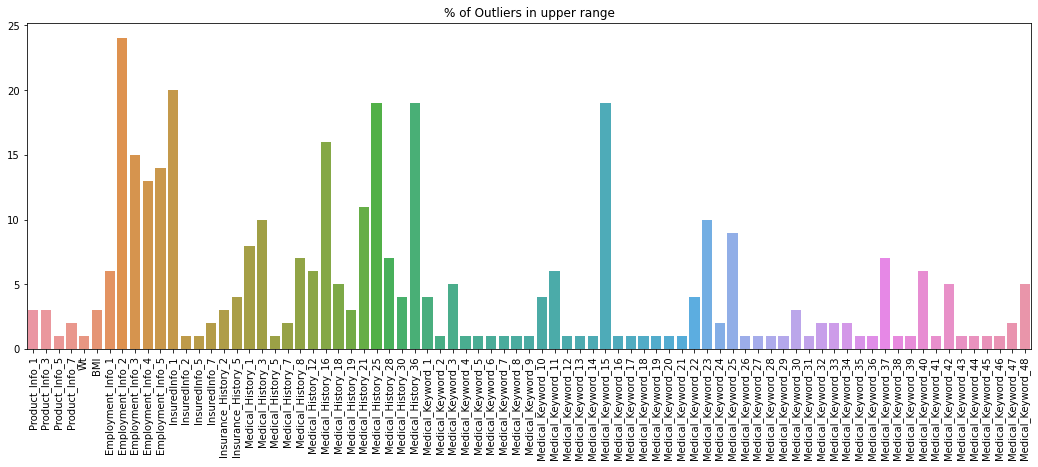

In [18]:
# Plot outliers in upper bound
plt.figure(figsize = (18,6))
sns.barplot(cols_with_outliers_in_upper_range , values_in_upper_range)
plt.title('% of Outliers in upper range')
plt.xticks(rotation=90)



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

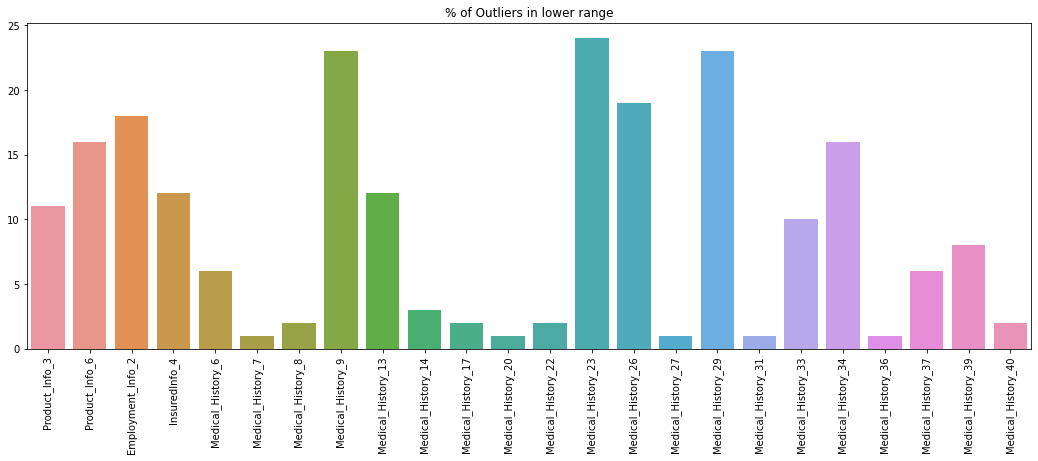

In [19]:
# Plot outliers in lower bound
plt.figure(figsize=(18,6))
sns.barplot(cols_with_outliers_in_lower_range, values_in_lower_range)
plt.title('% of Outliers in lower range')
plt.xticks(rotation=90)

There are many columns with very high percentage of outliers in upper range. We can impute these values with 75th quartile value plus 1.5 times inter quartile range. Similarly the lower range outliers can be imputed with 25th quartile value minus 1.5 times interquartile range. For performing this we create the following class.

In [20]:
class treat_outliers_by_iqr_range(BaseEstimator, TransformerMixin):
    def __init__(self, dropnumlist):
        self.dropnumlist = dropnumlist
    def fit(self,X,y=None):
        self.stats = X.drop(self.dropnumlist, axis=1).describe(include =np.number)
        self.iqr_dict = {}
        for col in self.stats.columns:
            iqr = self.stats.loc['75%', col] - self.stats.loc['25%', col]
            upper = self.stats.loc['75%', col] + 1.5*iqr
            lower = self.stats.loc['25%', col] - 1.5*iqr
            self.iqr_dict[col] = (lower , upper)
        return self
    def transform(self, X, y=None):
        for col in self.stats.columns:
            X[col] = X[col].apply(lambda x : np.where(x>self.iqr_dict[col][1], self.iqr_dict[col][1], x))
            X[col] = X[col].apply(lambda x : np.where(x<self.iqr_dict[col][0], self.iqr_dict[col][0], x))
        return X

In [21]:
# Now finally we can transform the train data, and the outliers will get imputed suitably
treat_outlier = treat_outliers_by_iqr_range(dropnumlist = ['Id','Response'])
df = treat_outlier.fit_transform(df)

### Build pre-processing pipeline and split the train data

In [23]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler()),])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('cat', OneHotEncoder()),])

full_pipeline = ColumnTransformer([('num', num_pipeline,numlist), ('cat', cat_pipeline, catlist),])

X = full_pipeline.fit_transform(df.drop(['Id','Response'], axis=1))
y = df['Response'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.10, random_state=3, stratify=df['Response'])

### Train with Random forest Classifier

In [24]:
rf = RandomForestClassifier()
rf.fit(X,y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
train_pred=rf.predict_proba(X)
print(roc_auc_score(y, train_pred, multi_class='ovr'))

1.0


In [26]:
train_pred=rf.predict(X)

In [27]:
print(classification_report(y, train_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6207
           2       1.00      1.00      1.00      6552
           3       1.00      1.00      1.00      1013
           4       1.00      1.00      1.00      1428
           5       1.00      1.00      1.00      5432
           6       1.00      1.00      1.00     11233
           7       1.00      1.00      1.00      8027
           8       1.00      1.00      1.00     19489

    accuracy                           1.00     59381
   macro avg       1.00      1.00      1.00     59381
weighted avg       1.00      1.00      1.00     59381



In [28]:
test_pred=rf.predict_proba(X_test)
print(roc_auc_score(y_test, test_pred, multi_class='ovr'))

1.0


In [29]:
test_pred=rf.predict(X_test)

In [30]:
print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       621
           2       1.00      1.00      1.00       655
           3       1.00      1.00      1.00       101
           4       1.00      1.00      1.00       143
           5       1.00      1.00      1.00       543
           6       1.00      1.00      1.00      1124
           7       1.00      1.00      1.00       803
           8       1.00      1.00      1.00      1949

    accuracy                           1.00      5939
   macro avg       1.00      1.00      1.00      5939
weighted avg       1.00      1.00      1.00      5939



### Preparing test set from 'test.csv' file

In [31]:
test = pd.read_csv('test.csv')

In [32]:
test = test.drop(dropcols, axis=1)

In [33]:
test = treat_outlier.transform(test)

In [34]:
test_set=full_pipeline.transform(test.drop(['Id'], axis=1))

In [35]:
test_set.shape

(19765, 141)

In [36]:
X.shape

(59381, 141)

In [37]:
test_set_pred=rf.predict(test_set)

In [38]:
submission=pd.read_csv('sample_submission.csv')
submission['Response']=test_set_pred
submission.to_csv('my_submission1.csv', index=False)

### Train and predict with Deep Neural Network

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
X.shape[1:]     

(141,)

In [42]:
# Since we have selected loss='sparse_categorical_crossentropy', which takes target values from 0 to 7 for 8 output neurons. We replace the values accordingly and will restore them after generating predictions.
map_dict = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7}

for k, v in map_dict.items():
    y[y == k] = v
    y_test[y_test == k] = v

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=X.shape[1:] )) 

model.add(keras.layers.Dense(600, activation="selu",kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(600, activation="selu",kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(600, activation="selu",kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(600, activation="selu",kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(600, activation="selu",kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(600, activation="selu",kernel_initializer="lecun_normal"))

model.add(keras.layers.Dense(8, activation="softmax"))

In [47]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [ ]:
#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model1.h5", save_best_only=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X, y, epochs=100,
                    validation_data=(X_test, y_test), callbacks=[checkpoint_cb])


Epoch 1/100
1856/1856 [==============================] - 28s 15ms/step - loss: 1.4756 - accuracy: 0.4536 - val_loss: 1.3890 - val_accuracy: 0.4821
Epoch 2/100
1856/1856 [==============================] - 28s 15ms/step - loss: 1.3873 - accuracy: 0.4830 - val_loss: 1.3527 - val_accuracy: 0.4913
Epoch 3/100
1856/1856 [==============================] - 28s 15ms/step - loss: 1.3625 - accuracy: 0.4919 - val_loss: 1.3204 - val_accuracy: 0.5033
Epoch 4/100
1856/1856 [==============================] - 28s 15ms/step - loss: 1.3477 - accuracy: 0.4986 - val_loss: 1.3168 - val_accuracy: 0.5144
Epoch 5/100
1856/1856 [==============================] - 28s 15ms/step - loss: 1.3369 - accuracy: 0.5032 - val_loss: 1.3087 - val_accuracy: 0.5161
Epoch 6/100
1856/1856 [==============================] - 28s 15ms/step - loss: 1.3291 - accuracy: 0.5059 - val_loss: 1.2919 - val_accuracy: 0.5169
Epoch 7/100
1856/1856 [==============================] - 28s 15ms/step - loss: 1.3219 - accuracy: 0.5079 - val_loss: 1

In [49]:
history = model.fit(X, y, epochs=30,
                    validation_data=(X_test, y_test), callbacks=[checkpoint_cb])

Epoch 1/30
1856/1856 [==============================] - 29s 16ms/step - loss: 0.2175 - accuracy: 0.9265 - val_loss: 0.2100 - val_accuracy: 0.9313
Epoch 2/30
1856/1856 [==============================] - 29s 16ms/step - loss: 0.2077 - accuracy: 0.9292 - val_loss: 0.1584 - val_accuracy: 0.9446
Epoch 3/30
1856/1856 [==============================] - 28s 15ms/step - loss: 0.2103 - accuracy: 0.9288 - val_loss: 0.2413 - val_accuracy: 0.9195
Epoch 4/30
1856/1856 [==============================] - 28s 15ms/step - loss: 0.2299 - accuracy: 0.9226 - val_loss: 0.1928 - val_accuracy: 0.9308
Epoch 5/30
1856/1856 [==============================] - 28s 15ms/step - loss: 0.2480 - accuracy: 0.9183 - val_loss: 0.2368 - val_accuracy: 0.9165
Epoch 6/30
1856/1856 [==============================] - 28s 15ms/step - loss: 0.2338 - accuracy: 0.9218 - val_loss: 0.2172 - val_accuracy: 0.9294
Epoch 7/30
1856/1856 [==============================] - 31s 17ms/step - loss: 0.1866 - accuracy: 0.9372 - val_loss: 0.2030 -

In [50]:
history = model.fit(X, y, epochs=30,
                    validation_data=(X_test, y_test), callbacks=[checkpoint_cb])

Epoch 1/30
1856/1856 [==============================] - 32s 17ms/step - loss: 0.0429 - accuracy: 0.9861 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 2/30
1856/1856 [==============================] - 31s 16ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0222 - val_accuracy: 0.9939
Epoch 3/30
1856/1856 [==============================] - 29s 15ms/step - loss: 0.0114 - accuracy: 0.9971 - val_loss: 0.0118 - val_accuracy: 0.9978
Epoch 4/30
1856/1856 [==============================] - 29s 15ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.0077 - val_accuracy: 0.9990
Epoch 5/30
1856/1856 [==============================] - 29s 15ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 6/30
1856/1856 [==============================] - 29s 15ms/step - loss: 0.0038 - accuracy: 0.9997 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 7/30
1856/1856 [==============================] - 29s 15ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.0045 -

In [55]:
model1 = keras.models.load_model("my_keras_model1.h5")

In [66]:
pred=np.argmax(model1.predict(X_test), axis=1)

In [68]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(pred, y_test, weights='quadratic'))

1.0


In [83]:
test_set_pred=np.argmax(model1.predict(test_set), axis=1)

In [84]:
np.unique(test_set_pred)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [85]:
test_set_pred=test_set_pred +1

In [86]:
np.unique(test_set_pred)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [89]:
submission=pd.read_csv('sample_submission.csv')

In [90]:
submission['Response']=test_set_pred

In [91]:
submission.to_csv('my_submission2.csv', index=False)